# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling

In [2]:
data = pd.read_csv('datasets/clean/cleaned_solar_radiation.csv')
data.head()

,Unnamed: 0,MonthPE,DayPE,Date,Daily_Temp,Daily_Precipitation,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2016-12-31,12,31,2016-12-31,28.166667,28.366667,62.025000,1006.733333,189.416667,0.891667,95.250000,286.666667,360.166667
1,2017-01-01,1,1,2017-01-01,28.125000,30.116667,64.741667,1006.258333,256.416667,0.925000,108.750000,279.000000,363.083333
2,2017-01-02,1,2,2017-01-02,28.216667,27.316667,63.750000,1006.791667,301.666667,0.875000,124.166667,280.750000,376.583333
3,2017-01-03,1,3,2017-01-03,28.275000,25.658333,60.783333,1006.766667,173.750000,0.825000,204.250000,262.750000,413.833333
4,2017-01-04,1,4,2017-01-04,28.250000,26.850000,56.991667,1006.416667,255.166667,1.208333,202.833333,261.666667,412.750000


In [3]:
data.columns

Index(['Unnamed: 0', 'MonthPE', 'DayPE', 'Date', 'Daily_Temp',
       'Daily_Precipitation', 'Daily_Humidity', 'Daily_Pressure',
       'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI',
       'Daily_radiation'],
      dtype='object')

In [4]:
data.columns

Index(['Unnamed: 0', 'MonthPE', 'DayPE', 'Date', 'Daily_Temp',
       'Daily_Precipitation', 'Daily_Humidity', 'Daily_Pressure',
       'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI',
       'Daily_radiation'],
      dtype='object')

In [5]:
data = data.drop(['Unnamed: 0', 'Date'], axis =1)

In [6]:
data.columns

Index(['MonthPE', 'DayPE', 'Daily_Temp', 'Daily_Precipitation',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_DHI', 'Daily_radiation'],
      dtype='object')

# Model training and testing and validation

#### split the dataset into 70% train, 15% test, 15% validation

In [7]:
train_data, test_data, validation_data = np.split(data.sample(frac=1), [int(.7 *len(data)), int(.85 *len(data))])

# save the results into distinctive .csv files
train_data.to_csv('~/OneDrive/Documents/DS/Omdena-MlOps/Assignment 4/Solar Radiation Project/datasets/clean/train_data.csv', header=True, index=False)
test_data.to_csv('~/OneDrive/Documents/DS/Omdena-MlOps/Assignment 4/Solar Radiation Project/datasets/clean/test_data.csv', header=True, index=False)
validation_data.to_csv('~/OneDrive/Documents/DS/Omdena-MlOps/Assignment 4/Solar Radiation Project/datasets/clean/validation_data.csv', header=True, index=False)

In [8]:
train_df = pd.read_csv('datasets/clean/train_data.csv')
X_train = train_df.drop(['Daily_radiation'], axis=1)
y_train = train_df['Daily_radiation']

In [9]:
test_df = pd.read_csv('datasets/clean/test_data.csv')
X_test = test_df.drop(['Daily_radiation'], axis=1)
y_test = test_df['Daily_radiation']

## Modelling using Linear Regression

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Setup the pipeline steps
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]

# Create the pipeline
pipeline_lr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

#### Evaluating Linear Regression performance

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(y_test, y_pred_lr, squared=False)
MAE = mean_absolute_error(y_test, y_pred_lr)

print('r2_score', r2_score(y_test, y_pred_lr))
print('Root Mean Squared Error: %.2f' % np.sqrt(MSE))
print('Root Mean Absolute Error: %.2f' % np.sqrt(MAE))

r2_score 0.9878751354068479
Root Mean Squared Error: 3.45
Root Mean Absolute Error: 3.01


#### Plot actual value by predicted value

<Figure size 576x432 with 0 Axes>

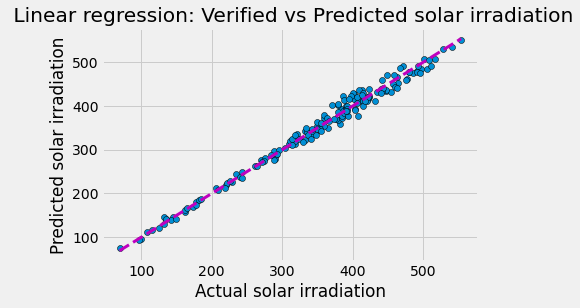

In [12]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')

fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.show() 

## Modelling using Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]

# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

#### Evaluating Random Forest performance

In [14]:
MSE_rf = mean_squared_error(y_test, y_pred_rfr, squared=False)
MAE_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score', r2_score(y_test, y_pred_rfr))
print('Root Mean Squared Error: %.2f' % np.sqrt(MSE_rf))
print('Root Mean Absolute Error: %.2f' % np.sqrt(MAE_rf))

r2_score 0.9841972053369032
Root Mean Squared Error: 3.69
Root Mean Absolute Error: 3.21


#### Plot actual value by predicted value

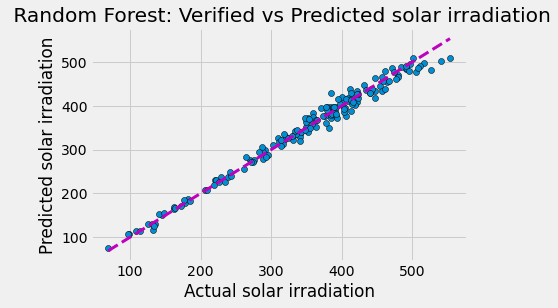

In [15]:
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

## Modelling using GradientBoosting Regressor

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]

# Create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

#### Evaluating GradientBoosting Regressor performance

In [17]:
MSE_gr = mean_squared_error(y_test, y_pred_gbr, squared=False)
MAE_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score', r2_score(y_test, y_pred_gbr))
print('Root Mean Squared Error: %.2f' % np.sqrt(MSE_gr))
print('Root Mean Absolute Error: %.2f' % np.sqrt(MAE_gr))

r2_score 0.9852147836354881
Root Mean Squared Error: 3.63
Root Mean Absolute Error: 3.12


#### Plot actual value by predicted value

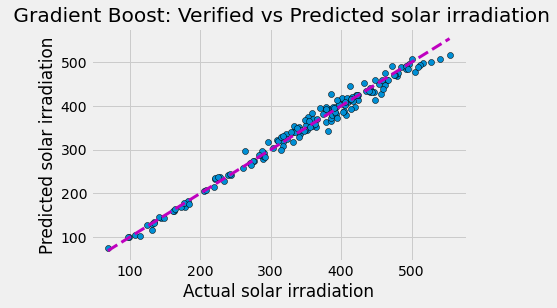

In [18]:
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

## Model Validation

In [19]:
val_df = pd.read_csv('datasets/clean/validation_data.csv')
X_val = val_df.drop(['Daily_radiation'], axis =1)
y_val = val_df['Daily_radiation']

### Linear Regresion Validation

In [20]:
y_validate_lr = pipeline_lr.predict(X_val)

MSE_lr_val = mean_squared_error(y_val, y_validate_lr, squared=False)
MAE_lr_val = mean_absolute_error(y_val, y_validate_lr)

print('r2_score: ', r2_score(y_val, y_validate_lr))
print('Linear Regression - MSE: %.2f' %np.sqrt(MSE_lr_val))
print('Linear Regression - MAE: %.2f' % np.sqrt(MAE_lr_val))

r2_score:  0.9863883902450732
Linear Regression - MSE: 3.46
Linear Regression - MAE: 3.09


### Random Forest Regressor Validation

In [21]:
y_validate_rfr = pipeline_rfr.predict(X_val)

MSE_rfr_val = mean_squared_error(y_val, y_validate_rfr, squared=False)
MAE_rfr_val = mean_absolute_error(y_val, y_validate_rfr)

print('r2_score: ', r2_score(y_val, y_validate_rfr))
print('Random Forest Regressor - MSE: %.2f' %np.sqrt(MSE_rfr_val))
print('Random Forest Regressor - MAE: %.2f' % np.sqrt(MAE_rfr_val))

r2_score:  0.9845169890932013
Random Forest Regressor - MSE: 3.57
Random Forest Regressor - MAE: 3.17


### Gradient Boosting Regressor Validation

In [22]:
y_validate_gbr = pipeline_gbr.predict(X_val)

MSE_gbr_val = mean_squared_error(y_val, y_validate_gbr, squared=False)
MAE_gbr_val = mean_absolute_error(y_val, y_validate_gbr)

print('r2_score: ', r2_score(y_val, y_validate_gbr))
print('Gradient Boosting Regressor - MSE: %.2f' %np.sqrt(MSE_gbr_val))
print('Gradient Boosting Regressor - MAE: %.2f' % np.sqrt(MAE_gbr_val))

r2_score:  0.9838610374067176
Gradient Boosting Regressor - MSE: 3.61
Gradient Boosting Regressor - MAE: 3.09
